### <center> Real data example: Recôncavo Basin,  Bahia, Brasil

In [1]:
#----------------------------- ALL INTERNAL PACKAGES --------------------------- #
import numpy as np
import ipywidgets as widgets
import scipy as sp
import pandas as pd
import pylab as py
import matplotlib.pyplot as plt
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from IPython.display import Latex
#from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import axes3d
#import pyproj
import utm

### Leitura dos dados  - DZ Oasis Montaj

In [2]:
# ------------- Use pandas to read the real data -----------------:
# dados parcialmente interpolados na regiao do rifte abortado (RECOMENDACAO: LER LAT, LON): 
nome=['UTMe', 'UTMn', 'Boug_Res',]
data = pd.read_csv('BOUG_RESIDUAL_Cont4000.xyz', sep='\s+', header=0, usecols= (0,1,3), names=nome)

In [3]:
data

,UTMe,UTMn,Boug_Res
0,503000,8562000,-10.245176
1,504000,8562000,-10.024328
2,505000,8562000,-8.476248
3,506000,8562000,-6.585188
4,507000,8562000,-5.321729
5,516000,8562000,3.351594
6,517000,8562000,3.595302
7,518000,8562000,3.192230
8,523000,8562000,1.434761
9,524000,8562000,1.245644


## <center> Definicao do perfil gravimétrico a partir do banco de dados pre-filtrados: <center>

In [4]:
# bibliotecas externas:
from modules.grids import profile

In [33]:
# construcao dos pontos inicial e final do perfil em funcao da linha sismica:


p1=(-38.87, -12.55) #ponto na borda flexural da bacia (VAI FAZER A BACIA AFLORAR EM Z=0)

p2= (-38.10, -12.675) #(-38.18, -12.675) #ponto na borda de falha da bacia 


## Edição das coordenadas

In [6]:
data['Lat'] = utm.to_latlon(-38.87,-12.55, force_zone_number=24)
p2_m= utm.from_latlon(-38.18,-12.675, force_zone_number=24)

dist= (((p1_m[0]-p2_m[0])**2 +(p1_m[1]-p2_m[1])**2)**(0.5))/1000 #distancia em Km
#dist
p1_m
p2_m

(2823033.377007486, 5430683.264749841, 24)

In [34]:
# lat lon do banco de dados Oasis computados pela funcao utm:
npo = len(data)
print ('numero de dados=', npo)
lon = np.zeros(npo)
lat = np.zeros(npo)

for i in range(npo):
    lat[i], lon[i] = utm.to_latlon(data['UTMe'][i], data['UTMn'][i],zone_number=24, zone_letter='K' )

# adicionando as colunas 'Lat' e 'Lon' no dataframe Oasis:
data['Lon'] = lon
data['Lat'] = lat    


numero de dados= 9317


In [28]:
data

,UTMe,UTMn,Boug_Res,Lon,Lat
0,503000,8562000,-10.245176,-38.972334,-13.007814
1,504000,8562000,-10.024328,-38.963113,-13.007813
2,505000,8562000,-8.476248,-38.953891,-13.007811
3,506000,8562000,-6.585188,-38.944669,-13.007810
4,507000,8562000,-5.321729,-38.935447,-13.007807
5,516000,8562000,3.351594,-38.852450,-13.007773
6,517000,8562000,3.595302,-38.843229,-13.007768
7,518000,8562000,3.192230,-38.834007,-13.007762
8,523000,8562000,1.434761,-38.787898,-13.007729
9,524000,8562000,1.245644,-38.778676,-13.007721


In [8]:
pp1=(p1_m[0],p1_m[1])
pp2=(p2_m[0],p2_m[1])
pp1
pp2

(2823033.377007486, 5430683.264749841)

In [35]:
size = int(np.size(data['Boug_Res']) * 10.0/100.0 )
size
#data['Boug_Res']

931

In [36]:
perfil = profile(np.array(data['Lon']), np.array(data['Lat']), np.array(data['Boug_Res']), p1, p2, size)

In [37]:
perfil[2]

array([  6.47988373,   6.54024892,   6.6006141 ,   6.66097928,
         6.72134446,   6.7868212 ,   6.87064958,   6.95447796,
         7.03830635,   7.12213473,   7.08697366,   6.67803197,
         6.26909027,   5.86014858,   5.45120688,   5.05294324,
         4.65970307,   4.26646289,   3.87322272,   3.47998254,
         3.08674237,   2.68618847,   2.23317834,   1.7801682 ,
         1.33673352,   0.95095568,   0.56517785,   0.17940001,
        -0.20637783,  -0.59215566,  -0.9779335 ,  -1.36371133,
        -1.74895814,  -1.96531259,  -2.1700708 ,  -2.36725567,
        -2.56444054,  -2.76162541,  -2.95881028,  -3.15599515,
        -3.35318003,  -3.5503649 ,  -3.75247425,  -3.9687946 ,
        -4.02585295,  -4.07810003,  -4.13034711,  -4.18259418,
        -4.23484126,  -4.28708834,  -4.33933542,  -4.39158249,
        -4.44382957,  -4.47347756,  -4.48312845,  -4.49926501,
        -4.51740165,  -4.53553829,  -4.55367494,  -4.57181158,
        -4.58994822,  -4.60808486,  -4.6262215 ,  -4.59

### Plots

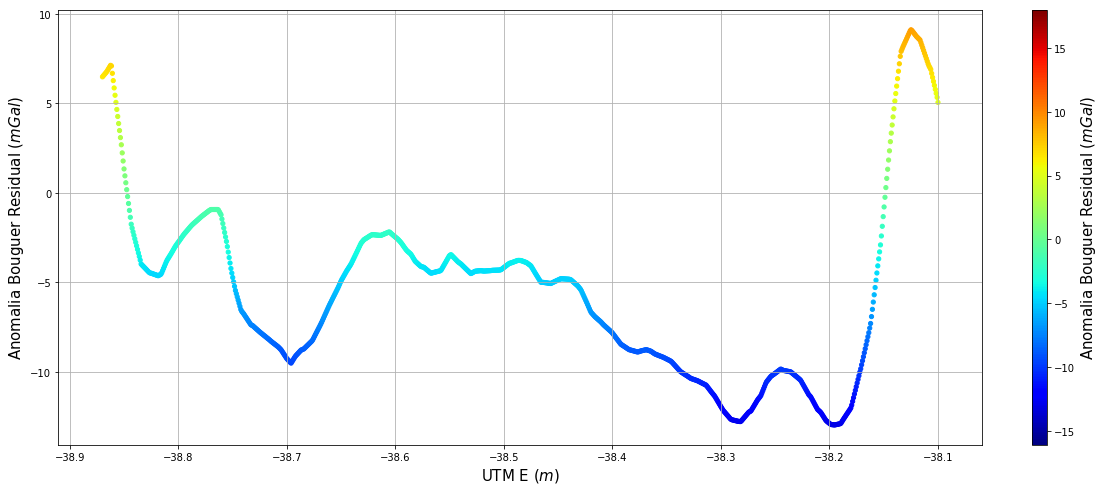

In [40]:
# ------------ set figure size: ------------------------------------------#
plt.close('all')
fig = plt.figure(figsize=(18,8), facecolor='w')

plt.xlabel('UTM E ($m$)', fontsize = 15)
plt.ylabel('Anomalia Bouguer Residual ($mGal$)', fontsize = 15)


p = plt.scatter(perfil[0], perfil[2], s=70.0, c=perfil[2], marker='.', cmap=plt.cm.jet,
                 vmin = data['Boug_Res'].min(), vmax = data['Boug_Res'].max())
cbar = plt.colorbar(p, aspect=30, fraction = 0.03, orientation="vertical")
cbar.set_label('Anomalia Bouguer Residual $ (mGal) $',fontsize=15, rotation = 90)
#plt.legend(loc=1)
plt.grid()
plt.savefig('Dados finais/perfil_Cont4000.png', dpi=300, transparent=True, bbox_inches='tight')
plt.show()

In [39]:
# Salvando arquivo para georeferenciamento no mapa geológico de reconcavo:
g = {'Lon': perfil[0], 'Lat': perfil[1], 'Boug_residual': perfil[2]}
geo_ref = pd.DataFrame(g)

### TODO: verificar o por que o pandas coloca as colunas por ordem alfabética #####

# salvando arquivo para georeferenciamento for ROD:
geo_ref.to_csv('bouguer_recon_perfil_Cont4000.txt', sep = ' ', index=False)